In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [164]:
#read the dataset
df = pd.read_csv("height-weight.csv")

In [165]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [166]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


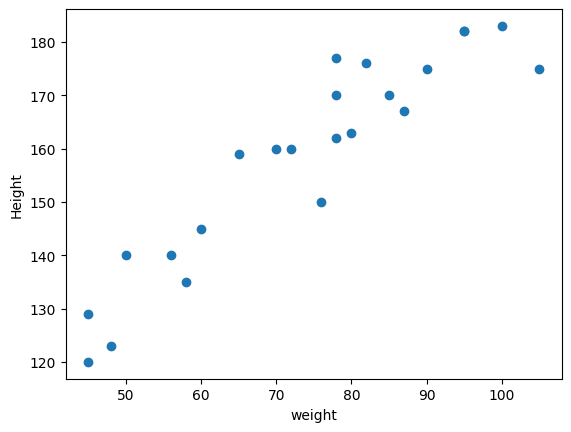

In [167]:
plt.scatter(df.Weight, df.Height)
plt.xlabel("weight")
plt.ylabel("Height")
plt.show()

In [168]:
#Problem statement>> I want to predict height based on weight

In [169]:
#divide the data into X and y
X = df[["Weight"]]
y = df["Height"]

In [170]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [171]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [172]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [173]:
X_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [174]:
X_test

,Weight
20,45
17,65
3,60
13,100
19,87
16,50


In [175]:
y_train

10    176
4     160
2     123
18    150
6     163
7     175
1     135
14    170
0     120
15    177
22    160
21    140
9     170
8     182
12    175
11    182
5     162
Name: Height, dtype: int64

In [176]:
y_test

20    129
17    159
3     145
13    183
19    167
16    140
Name: Height, dtype: int64

In [177]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [178]:
#scaling(optional) >> standardization>> fit_transform on train data and transform on test data
#if you use fit on test data, (that is wrong) you are doing data leakage, avoid it
#most of the ml model standardscaler is used as it deals with normal distribution

In [179]:
from sklearn.preprocessing import StandardScaler

In [180]:
scaler = StandardScaler()

In [181]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [182]:
X_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [183]:
X_test

,Weight
20,45
17,65
3,60
13,100
19,87
16,50


In [184]:
#scaling should be done always after train test split
#target variableshould not be scaled
#avoid scaling categorical features
X_train = scaler.fit_transform(X_train) #for train data use fit_transform
X_test = scaler.transform(X_test) #for test data use transform

In [185]:
X_test

array([[-1.91781863],
       [-0.678164  ],
       [-0.98807766],
       [ 1.49123159],
       [ 0.68545609],
       [-1.60790497]])

In [186]:
X_train

array([[ 0.37554243],
       [-0.36825034],
       [-1.73187043],
       [ 0.00364604],
       [ 0.25157697],
       [ 0.87140428],
       [-1.11204312],
       [ 0.56149062],
       [-1.91781863],
       [ 0.12761151],
       [-0.24428488],
       [-1.23600858],
       [ 0.12761151],
       [ 1.18131794],
       [ 1.80114525],
       [ 1.18131794],
       [ 0.12761151]])

In [187]:
X_test

array([[-1.91781863],
       [-0.678164  ],
       [-0.98807766],
       [ 1.49123159],
       [ 0.68545609],
       [-1.60790497]])

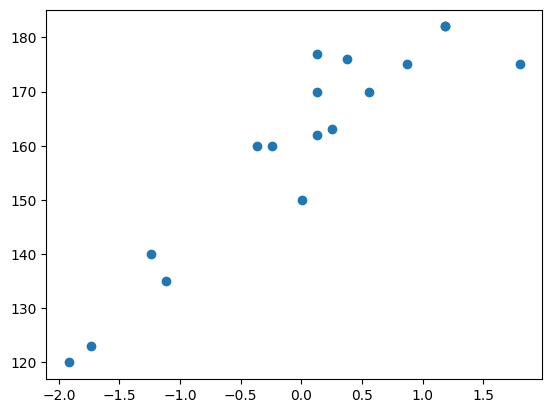

In [188]:
#scaling is optional >> why because it doen't affect the distribution of the data
plt.scatter(X_train, y_train)

In [189]:
#model training
from sklearn.linear_model import LinearRegression

#linear regression parameters
#fit_intercept >> The best fit line will have intercept, by default it is true
#copy_X >> copy the original X_train and then build the model, it will not modify the original data
#n_jobs >>-1 means using all processors.
#positive>> When set to True, forces the coefficients to be positive.

#fit>> train the model
#predict>> test the model

#after building the model, you have attributes of the model
#coef_
#intercept

In [190]:
regressor = LinearRegression()

In [191]:
regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [192]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [193]:
regressor.coef_

array([17.7307072])

In [194]:
regressor.intercept_

np.float64(160.0)

In [195]:
print("The slope or coeff of model is ", regressor.coef_)
print("The intercept of the model is ", regressor.intercept_)

The slope or coeff of model is  [17.7307072]
The intercept of the model is  160.0


In [196]:
#prediction on train data
#interpretation of coef>> one unit increase in weight, on average the height increase by 17.73 units
#predicted height(y) on Xtrain = 160 + 17.73 * (Xtrain)

#predicted height(y) on Xtest = 160 + 17.73 * (Xtest)

In [197]:
#prediction on train
regressor.predict(X_train)

array([166.65863288, 153.47066096, 129.29271243, 160.06464692,
       164.46063756, 175.45061417, 140.28268904, 169.95562586,
       125.99571945, 162.26264224, 155.66865628, 138.08469371,
       162.26264224, 180.94560247, 191.93557907, 180.94560247,
       162.26264224])

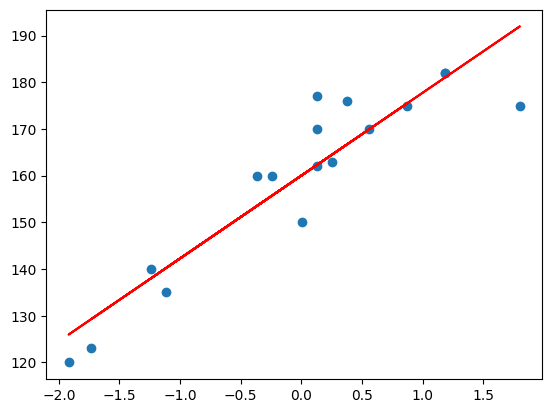

In [198]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

In [199]:
y_pred_test = regressor.predict(X_test)

In [200]:
y_pred_test

array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
       172.15362118, 131.49070775])

In [201]:
y_pred_test, y_test

(array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
        172.15362118, 131.49070775]),
 20    129
 17    159
 3     145
 13    183
 19    167
 16    140
 Name: Height, dtype: int64)

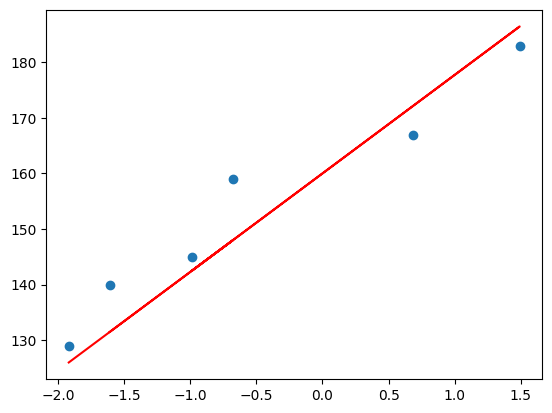

In [202]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), 'r')

In [203]:
#performance metrics

In [204]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [205]:
mean_absolute_error(y_test, y_pred_test)

5.608571289304838

In [206]:
mean_squared_error(y_test, y_pred_test)

41.285662830455514

In [207]:
rsq = r2_score(y_test,y_pred_test) #rsquare = 1-SSR/SST
rsq

0.8721036174256606

In [208]:
#adjusted rsquare 
#adjusted R2  = [1-(1-rsquare)*n-1/(n-k-1)] #n is no of observation and k is no of predictor variables

In [209]:
X_test.shape[1]

1

In [210]:
1-(1-rsq)*(len(y_test)-1)/(len(y_test)-X_test.shape[1] - 1)
#adjusted rsquare will be lesser than r square

0.8401295217820757

In [211]:
#assumption
#X-y should have linear relationship
#Observation should have no relation
#error should have constant variation
#error should be normally distributed
#features among themself should be least related

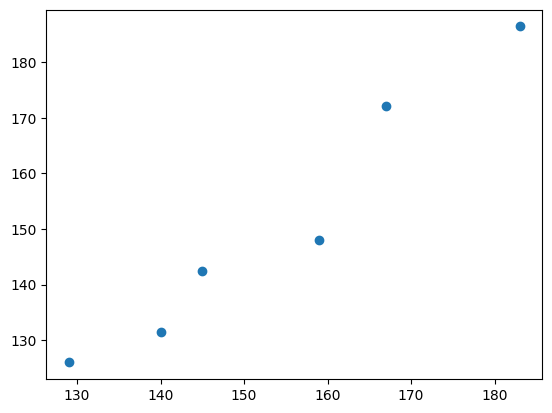

In [212]:
plt.scatter(y_test, y_pred_test)
#to chck if y_test and its prediction alighns

In [213]:
#error should have constant variation
#error should be normally distributed

In [214]:
error = y_test-y_pred_test
error

20     3.004281
17    11.024327
3      2.519316
13    -3.440591
19    -5.153621
16     8.509292
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

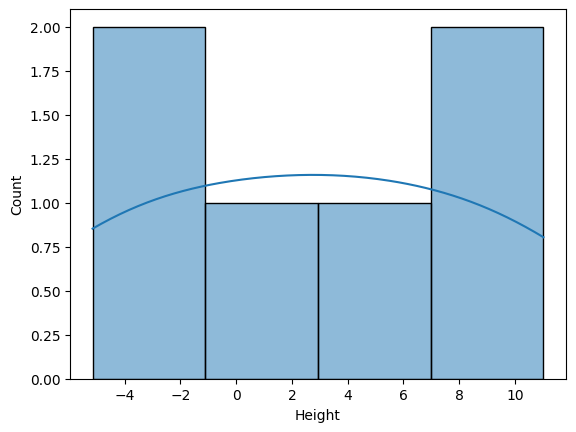

In [215]:
import seaborn as sns
sns.histplot(error,kde=True) #approximately a normal distribution

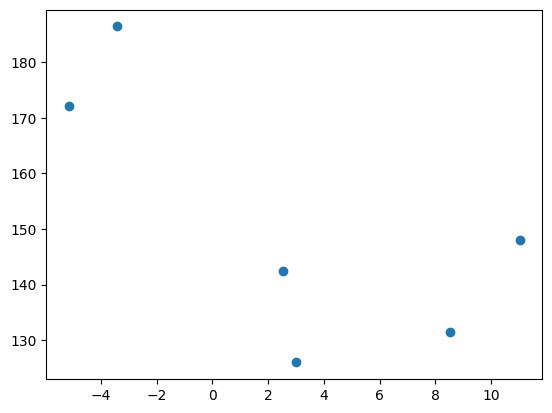

In [216]:
#to check constant variance
plt.scatter(error, y_pred_test)